<a href="https://colab.research.google.com/github/AishaEvering/ML_Models_From_Scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From Scratch

## Load Data

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [31]:
# generate data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
len(X), len(y)

(100, 100)

In [32]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((80, 1), (80,))

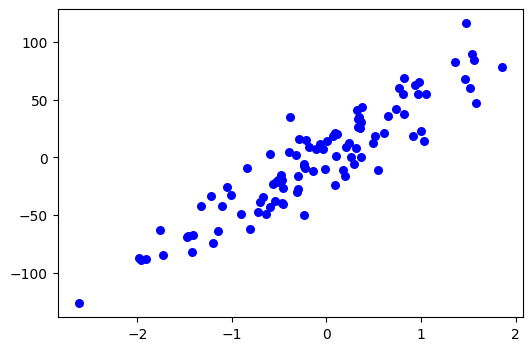

In [33]:
# plot data
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show();

## Create Linear Regression Function

### Equations

<u>Linear Equation</u>
<br><small>provides continuous variables</small>

$$
\widehat{y}=wx+b
$$

<small>
* $w$ = weight = slope<br>
* $b$ = bias = intercept<br>
* $x$ = weight value index<br>
* $\widehat{y}$ = predicted y
</small>
<br><br>
------------------------------------------------------------
<br>

<u>Calculate Derivatives</u>

*with respect to $w$*

$$dw = \frac{1}{N}\displaystyle\sum_{i=1}^n{x}_i(\widehat{y} - {y}_i)$$

*with respect to $b$*

$$db = \frac{1}{N}\displaystyle\sum_{i=1}^n(\widehat{y} - {y}_i)$$

<small>
* $N$ = number of samples<br>
* $x$ = weight<br>
* $\widehat{y}$ = predicted label<br>
* $y$ = label<br>
* $i$ = weight/label value index<br>
* $dw$ = derivative with respect to $w$<br>
* $db$ = derivative with respect to $b$<br>
</small>

------------------------------------------------------------
<br>

<u>Update Rules</u>

*new weight*
$$
w = w - a \times dw
$$
*new bias*
$$
b = b - a \times db
$$

<small>
* $w$ = weight = slope<br>
* $b$ = bias = intercept<br>
* $dw$ = derivative with respect to $w$<br>
* $db$ = derivative with respect to $b$<br>
* $a$ = alpha = learning rate
</small>

In [34]:
class LinearRegression():

  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # gradient descent
    for _ in range(self.n_iters):

      # get predicted
      y_predicted = np.dot(X, self.weights) + self.bias

      # derivative with respect to w
      dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))

      # derivative with respect to b
      db = (1/n_samples) * np.sum(y_predicted - y)

      # update weights and bias
      self._update(dw, db)

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def _update(self, dw, db):
    # update rules: new weight
    self.weights -= self.lr * dw

    # update rules: new bias
    self.bias -= self.lr * db


## Fit, Train, and Predict

In [35]:
# predict something
model_0 = LinearRegression()
model_0.fit(X_train, y_train)
predicted = model_0.predict(X_test)

## Get Mean Squared Error

**Cost/Loss Function**

MSE (Mean Squared Error)<br>
*On average how off are the predictions from the actual values?  We need to find the minimum.*

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} ({y}_i - (wx_i + {b}))^2
$$

${y}_i$ = actual value <br>
$(wx_i + {b})$ = approximated value

In [36]:
def MeanSquaredError(y_true, y_predicted):
  return np.mean((y_true - y_predicted)**2)

In [37]:
mse = MeanSquaredError(y_test, predicted)
print(f"MSE: {mse}")

MSE: 829.0731129530375


## Plot Predictions

In [39]:
def plot_predictions(model:LinearRegression, title, X=X, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):

  # make predictions with features
  y_pred_line = model.predict(X)

  cmap = plt.get_cmap('viridis')

  fig, ax = plt.subplots(figsize=(6,4))

  # plot train and test points
  ax.scatter(X_train, y_train, color=cmap(0.9), s=10)
  ax.scatter(X_test, y_test, color=cmap(0.5), s=10)
  ax.legend(['Train','Test'])

  # plot the predicted values as a line
  plt.plot(X, y_pred_line, color='black', linewidth=2)
  plt.title(title)
  plt.show()


MSE for 1st Model: 829.0731129530375


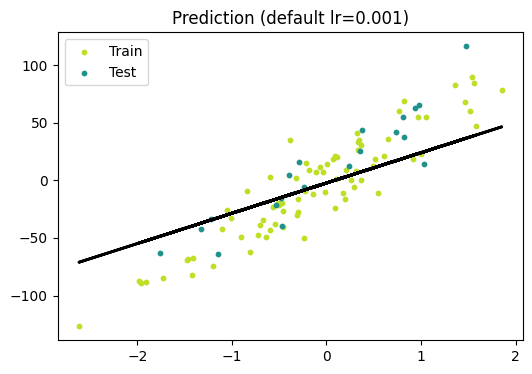

In [40]:
print(f"MSE for 1st Model: {mse}")
plot_predictions(model_0, title="Prediction (default lr=0.001)")

MSE for 2nd Model: 416.80890612748107


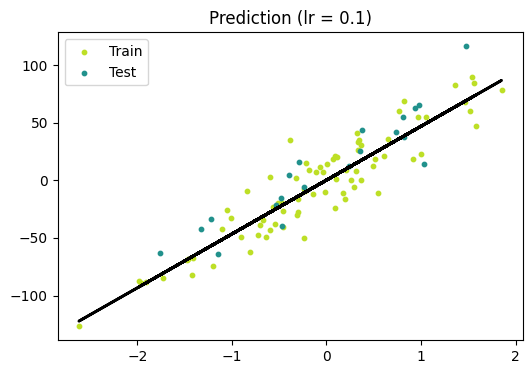

In [41]:
# adjust learning rate
model_1 = LinearRegression(lr=0.1)
model_1.fit(X_train, y_train)

predicted_1 = model_1.predict(X_test)

mse_1 = MeanSquaredError(y_test, predicted_1)
print(f"MSE for 2nd Model: {mse_1}")

plot_predictions(model_1, title="Prediction (lr = 0.1)")